# clusterizacion


In [3]:
import sys
sys.path.append("../scripts/")
from funciones_paralectura import carga_de_datos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [4]:
# carga de caminata aleatoria
documento = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW5.mat'
comentarios = ['discharge (random walk)',
               'rest (random walk)',
               'rest post random walk discharge']
for s in comentarios: print(s)
comentario_final = ['charge (after random walk discharge)']
for s in comentario_final: print(s)
t, v, c, temp, T = carga_de_datos(documento, comentarios, comentario_final, nofinal=False)

discharge (random walk)
rest (random walk)
rest post random walk discharge
charge (after random walk discharge)
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000


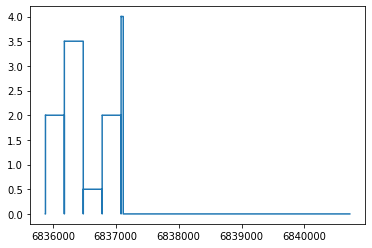

In [5]:
# print(t.keys())
plt.plot(t[400], c[400])

In [6]:
def guardar_serie_entre(serie, ti, deltaT, tamanno=0):
    arr = []
        
    fin = ti + deltaT
    if fin > len(serie): fin = len(serie) - 1
    ej = serie[ti]
    i = 0
    epsilon = 0.1

    
    if tamanno != 0: i = fin - tamanno
    else:
        for idx in range(40):
            if serie[ti - idx] > ej:
                ej = serie[ti - idx]
                i = idx
            elif serie[ti - idx] < ej - epsilon: break
        i = ti - i
    
    if i < 0: return np.array(serie[:fin])
    
    return np.array(serie[i : fin])

In [7]:
# creacion de vectores de diferencia de consumo de corriente

# creacion de diccionarios para guardar datos
centro_c = {}
t_salto = {}
pot = {}
pot_salto = {}
dif_salto_c = {}
centro_salto_c = {}
tiempo = {}
ciclo_salto = {}

# saltos = {}
# j = 0

arr_dif_salto_c = []
arr_pot_salto  = []
arr_centro_salto_c  = []
arr_ciclo_salto = []

arr_voltaje_salto = []
arr_corriente_salto = []
arr_tiempo_salto = []
arr_temperatura_salto = []

dx = 90

for i in c.keys():
#     if i == 0: continue
    if i == len(c.keys()) - 1: break
#     print(i)
    # creacion de vectores para guardar datos
    dif_salto_c[i] = []
    centro_c[i] = []
    centro_salto_c[i] = []
    t_salto[i] = []
    pot[i] = []
    pot_salto[i] = []
    tiempo[i] = []
    ciclo_salto[i] = []
    
    # condiciones iniciales
    anterior = 0
    POT = 0
    t_anterior = t[i][0]
    aux_t = 0
    ti = 0
    
    for idx, elem in enumerate(c[i]):
        # lectura de serie de tiempo
        
        dt = t[i][idx] - t_anterior # dt como variable auxiliar
        t_anterior = t[i][idx]
        POT += c[i][idx] * v[i][idx] * dt # se calcula la potencia integrando en el tiempo
        aux_t += dt # su acumulacion de tiempo
        
        centro_c[i].append((elem + anterior) / 2) # centro del salto
        pot[i].append(POT)
        tiempo[i].append(aux_t)
        
        if (elem - anterior >= 0.1):# or (elem - anterior <= -0.1):
            
            # solo entra si ocurre un salto
            
            dif_salto_c[i].append(elem - anterior) # magnitud del salto
            pot_salto[i].append(POT) # energia entregada al momento del salto
            centro_salto_c[i].append((elem + anterior) / 2) # media del salto
            t_salto[i].append(aux_t) # tiempo en que ocurre el salto
            ciclo_salto[i].append(i)
            
#             saltos[j] = {'ciclo': i,
#                         'energia': POT,
#                         'media': (elem + anterior) / 2,
#                         'magnitud': elem - anterior}
            
            arr_dif_salto_c.append(elem - anterior)
            arr_pot_salto.append(POT)
            arr_centro_salto_c.append((elem + anterior) / 2)
            arr_ciclo_salto.append(i)
            
            # como guardar la serie de tiempo de voltaje, corriente y temperatura 
            # del salto en un intervalo de tiempo
            dx = 90
            di = 10
            
            aux = guardar_serie_entre(v[i], idx, 2*dx)
            arr_voltaje_salto.append(aux)
            arr_corriente_salto.append(guardar_serie_entre(c[i], idx, 2*dx, tamanno=len(aux)))
            arr_tiempo_salto.append(guardar_serie_entre(t[i], idx, 2*dx, tamanno=len(aux)))
            arr_temperatura_salto.append(guardar_serie_entre(temp[i], idx, 2*dx, tamanno=len(aux)))
            
            ti = idx

        anterior = elem


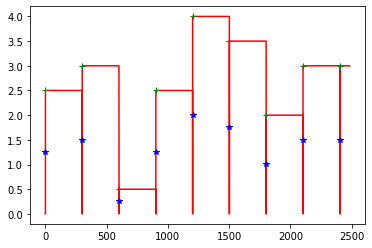

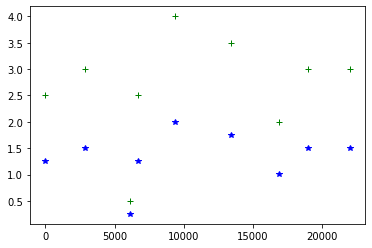

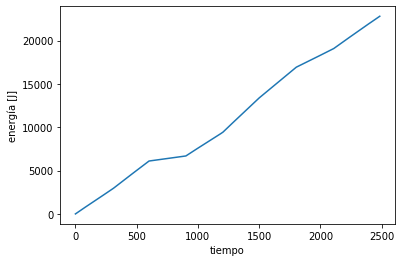

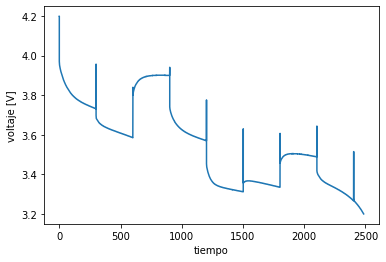

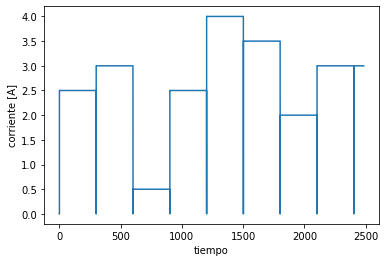

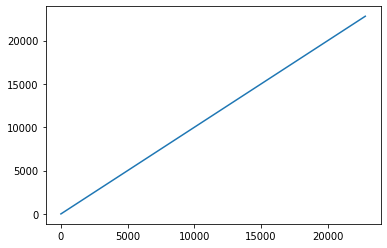

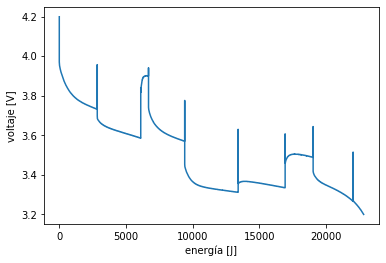

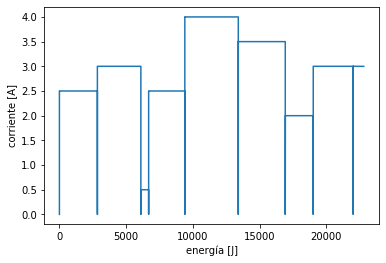

([<matplotlib.lines.Line2D at 0x18ee423aba8>],
 Text(17.200000000000003, 0.5, 'corriente [A]'),
 Text(0.5, 17.700000000000003, 'energía [J]'),
 None)

In [8]:

plt.plot(tiempo[2], c[2], color='r')
plt.plot(t_salto[2], dif_salto_c[2], '+g')
plt.plot(t_salto[2], centro_salto_c[2], '*b'), plt.show()

plt.plot(pot_salto[2], dif_salto_c[2], '+g')
plt.plot(pot_salto[2], centro_salto_c[2], '*b'), plt.show()

plt.plot(tiempo[2], pot[2]), plt.ylabel('energía [J]'), plt.xlabel('tiempo'), plt.show()
plt.plot(tiempo[2], v[2]), plt.ylabel('voltaje [V]'), plt.xlabel('tiempo'), plt.show()
plt.plot(tiempo[2], c[2]), plt.ylabel('corriente [A]'), plt.xlabel('tiempo'), plt.show()

plt.plot(pot[2], pot[2]), plt.show()
plt.plot(pot[2], v[2]), plt.ylabel('voltaje [V]'), plt.xlabel('energía [J]'), plt.show()
plt.plot(pot[2], c[2]), plt.ylabel('corriente [A]'), plt.xlabel('energía [J]'), plt.show()


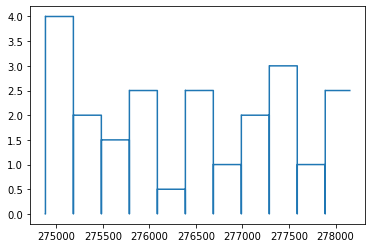

V:  4.199 3.522
C:  0.0 4.0
V:  3.842 3.744
C:  0.0 2.0
V:  3.879 3.752
C:  0.0 1.5
V:  3.854 3.569
C:  0.0 2.5
V:  3.747 3.787
C:  0.0 0.5
V:  3.828 3.495
C:  0.0 2.5
V:  3.683 3.658
C:  0.0 1.001
V:  3.737 3.502
C:  0.0 2.0
V:  3.657 3.329
C:  0.0 3.0


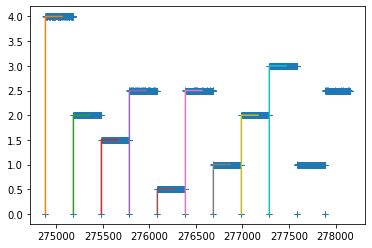

289667.97000000003 289847.00999999995
289968.56 290147.6
0.0 0.5
0.0 2.5
289066.76999999996 291552.0
0 2.999


In [9]:
plt.plot(t[1], c[1]), plt.show()
plt.plot(t[1], c[1], '+')#, plt.show()
# plt.plot(t[2], c[2], '-r')
# plt.plot(t[1], v[1]), plt.show()
# plt.plot(t[2], c[2]), plt.show()
# plt.plot(t[2], v[2]), plt.show()
for i in range(9):
#     print(len(arr_voltaje_salto[i]))
    print('V: ', arr_voltaje_salto[i][0], arr_voltaje_salto[i][-1])
    print('C: ', arr_corriente_salto[i][0], arr_corriente_salto[i][-1])
#     plt.plot(arr_tiempo_salto[i], arr_voltaje_salto[i]), plt.show()
    plt.plot(arr_tiempo_salto[i], arr_corriente_salto[i])#, plt.show()
plt.show()

print(arr_tiempo_salto[13][0], arr_tiempo_salto[13][-1])
print(arr_tiempo_salto[14][0], arr_tiempo_salto[14][-1])

print(arr_corriente_salto[13][0], arr_corriente_salto[13][-1])
print(arr_corriente_salto[14][0], arr_corriente_salto[14][-1])

print(t[2][0], t[2][-1])
print(c[2][0], c[2][-1])

In [10]:
import pandas as pd
saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}
df = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])
df['voltaje'] = [x for x in arr_voltaje_salto]
df['corriente'] = [x for x in arr_corriente_salto]
df['temperatura'] = [x for x in arr_temperatura_salto]
df['tiempo'] = [x for x in arr_tiempo_salto]
df.head()

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo
0,1,0.614047,4.005,2.0025,"[4.199, 3.833, 3.809, 3.801, 3.795, 3.789, 3.7...","[0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0, 4.0,...","[20.61039, 20.61039, 20.62594, 20.62594, 20.62...","[274884.5, 274884.54, 274885.54000000004, 2748..."
1,1,4266.690109,2.007,1.0035,"[3.842, 3.683, 3.688, 3.693, 3.698, 3.701, 3.7...","[0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.21202, 28.21202, 28.24...","[275184.7, 275184.74, 275185.74, 275186.74, 27..."
2,1,6510.697143,1.503,0.7515,"[3.879, 3.763, 3.762, 3.763, 3.763, 3.763, 3.7...","[0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.501, 1.5, 1...","[28.36748, 28.36748, 28.35193, 28.35193, 28.35...","[275485.35, 275485.39, 275486.38999999996, 275..."
3,1,8200.072656,2.504,1.2520,"[3.854, 3.657, 3.652, 3.65, 3.648, 3.646, 3.64...","[0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2.5, 2.5, 2...","[27.23267, 27.23267, 27.23267, 27.23267, 27.21...","[275785.81, 275785.85, 275786.85000000003, 275..."
4,1,10884.859898,0.504,0.2520,"[3.747, 3.708, 3.711, 3.715, 3.717, 3.72, 3.72...","[0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.08...","[276086.28, 276086.33, 276087.33, 276088.32999..."


In [11]:
df['temp_ini'] = [x[0] for x in df['temperatura']]
df.head()

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini
0,1,0.614047,4.005,2.0025,"[4.199, 3.833, 3.809, 3.801, 3.795, 3.789, 3.7...","[0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0, 4.0,...","[20.61039, 20.61039, 20.62594, 20.62594, 20.62...","[274884.5, 274884.54, 274885.54000000004, 2748...",20.61039
1,1,4266.690109,2.007,1.0035,"[3.842, 3.683, 3.688, 3.693, 3.698, 3.701, 3.7...","[0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.21202, 28.21202, 28.24...","[275184.7, 275184.74, 275185.74, 275186.74, 27...",28.18093
2,1,6510.697143,1.503,0.7515,"[3.879, 3.763, 3.762, 3.763, 3.763, 3.763, 3.7...","[0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.501, 1.5, 1...","[28.36748, 28.36748, 28.35193, 28.35193, 28.35...","[275485.35, 275485.39, 275486.38999999996, 275...",28.36748
3,1,8200.072656,2.504,1.2520,"[3.854, 3.657, 3.652, 3.65, 3.648, 3.646, 3.64...","[0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2.5, 2.5, 2...","[27.23267, 27.23267, 27.23267, 27.23267, 27.21...","[275785.81, 275785.85, 275786.85000000003, 275...",27.23267
4,1,10884.859898,0.504,0.2520,"[3.747, 3.708, 3.711, 3.715, 3.717, 3.72, 3.72...","[0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.08...","[276086.28, 276086.33, 276087.33, 276088.32999...",28.07212


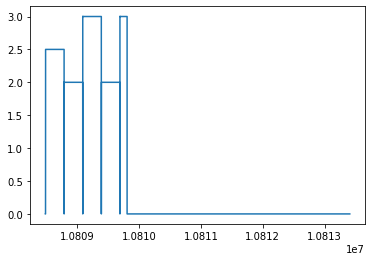

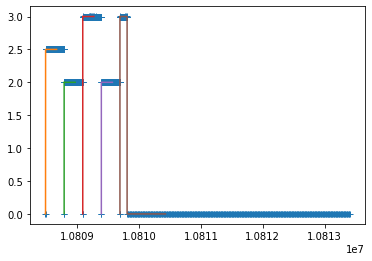

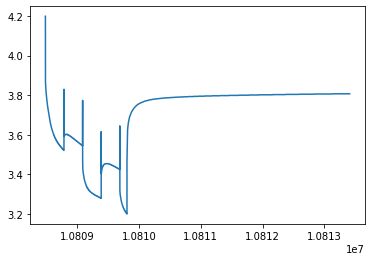

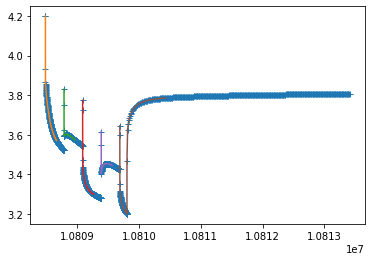

In [12]:
idx = 600
plt.plot(t[idx], c[idx]), plt.show()
plt.plot(t[idx], c[idx], '+')

tiemposs = df.loc[(df['ciclo'] == idx), 'tiempo'].values
corrientos = df.loc[(df['ciclo'] == idx), 'corriente'].values

for i, tempp in enumerate(tiemposs):
    plt.plot(tempp, corrientos[i])#, plt.show()#, plt.show()
plt.show()

plt.plot(t[idx], v[idx]), plt.show()
plt.plot(t[idx], v[idx], '+')

tiemposs = df.loc[(df['ciclo'] == idx), 'tiempo'].values
voltajos = df.loc[(df['ciclo'] == idx), 'voltaje'].values

for i, tempp in enumerate(tiemposs):
    plt.plot(tempp, voltajos[i])#, plt.show()#, plt.show()
plt.show()


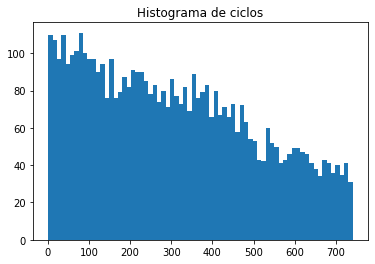

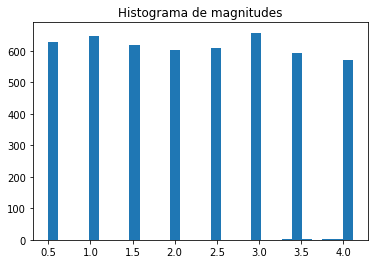

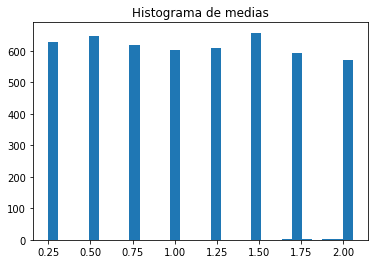

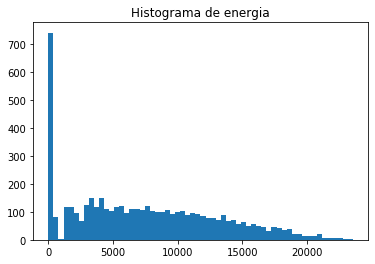

((array([741.,  81.,   2., 118., 116.,  97.,  69., 126., 148., 118., 150.,
         109., 103., 118., 121.,  96., 109., 111., 106., 122., 103.,  98.,
          98., 107.,  93., 101., 102.,  90.,  97.,  94.,  85.,  79.,  78.,
          72.,  87.,  68.,  72.,  57.,  65.,  49.,  55.,  48.,  45.,  32.,
          46.,  41.,  35.,  38.,  22.,  20.,  15.,  13.,  13.,  19.,   8.,
           8.,   6.,   5.,   3.,   3.]),
  array([8.30457620e-02, 3.92591180e+02, 7.85099313e+02, 1.17760745e+03,
         1.57011558e+03, 1.96262371e+03, 2.35513185e+03, 2.74763998e+03,
         3.14014812e+03, 3.53265625e+03, 3.92516438e+03, 4.31767252e+03,
         4.71018065e+03, 5.10268878e+03, 5.49519692e+03, 5.88770505e+03,
         6.28021319e+03, 6.67272132e+03, 7.06522945e+03, 7.45773759e+03,
         7.85024572e+03, 8.24275385e+03, 8.63526199e+03, 9.02777012e+03,
         9.42027826e+03, 9.81278639e+03, 1.02052945e+04, 1.05978027e+04,
         1.09903108e+04, 1.13828189e+04, 1.17753271e+04, 1.21678352e+04,


In [13]:
# analisis estadistico de los ciclos: ploteo de histogramas
plt.hist(df['ciclo'], bins=70), plt.title('Histograma de ciclos'), plt.show()
plt.hist(df['magnitud'], bins=30), plt.title('Histograma de magnitudes'), plt.show()
plt.hist(df['media'], bins=30), plt.title('Histograma de medias'), plt.show()
plt.hist(df['energia'], bins=60), plt.title('Histograma de energia'), plt.show()

In [14]:
# definiendo features
def primera_derivada(arr_serie):
    aux = []
    for serie in arr_serie:
        aux2 = list(serie[:-1] - serie[1:])
        if len(aux2) == 0: aux2 = [0]
        aux.append(aux2)
    return aux

#Delta temperatura
def deltaT(arr_serie, magnitud):
    aux = []
    for i in range(len(arr_serie)):
        if min(arr_serie[i])>0:
            delta = abs(arr_serie[i][-1]-arr_serie[i][0])/magnitud[i]
        else:
            delta = None
        aux.append(delta)   
    return aux

#Efecto capacitivo

#validacion
def Valid_data(data):
    if len(data)>100:
        ini = (data[15]-data[7]) > 0 
        final = [False,0]
        aux = 0
        index = 0
        if ini == True:
            for i in range(len(data)-1):
                if (data[i+1]-data[i]) <=0 :
                    if aux == 0:
                        index = i
                    aux += 1
                    if aux == 25:
                        final = [True,index]
                        break
                else:
                    aux = 0
        if ini == True and final[0] == True:
            return [True,final[1]]
        else:
            return [False,0]
    else:
        return [False,0]

    
def segunda_derivada(data):
    aux = []
    for i in data:
        valid = Valid_data(i)
        if valid[0] == True:
            inf = valid[1]
            der_mean = np.mean(np.diff(i[:inf]))
            aux.append(der_mean)
        else:
            aux.append(-1)
    return aux
                                   
def RC(data,time,ind):
    aux = []
    aux_2 = []
    for i in range(len(data)):
        valid = Valid_data(data[i])
        if valid[0] == True:
            inf = valid[1]
            Rc = (time[i][inf]-time[i][0])*0.632
            aux.append(Rc)
        else:
            aux.append(0)
    n = max(ind)
    k = 0
    for i in range(n-1):
        ind_aux = np.where(ind.values ==i+1)
        k += len(ind_aux[0])
        if len(ind_aux[0]) > 0:
            ini_aux = ind_aux[0][0]
            final_aux = ind_aux[0][-1]
            #print(ini_aux,final_aux)
            mean = np.mean(aux[ini_aux:final_aux])    
            kk = [mean]*len(ind_aux[0])
            aux_2 = np.append(aux_2, kk)
        else:
            aux_2 = np.append(aux_2, 0)
    return [aux,aux_2]




In [15]:
# obtener features
df["F1"] = [np.mean(x[:1]) for x in primera_derivada(df["voltaje"])]
df["F2"] = [x for x in deltaT(df["temperatura"],df["magnitud"])]   #Diferencia de temperatura
df["F3"] = [x for x in segunda_derivada(df["voltaje"])]  # segunda derivada
RC_test = RC(df["voltaje"],df["tiempo"],df["ciclo"])
df["F4"] = [x for x in RC_test[0]]   # circuito RC
#df["F5"] = [x for x in RC_test[1]]
df

C:\Users\cbaez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\cbaez\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini,F1,F2,F3,F4
0,1,0.614047,4.005,2.0025,"[4.199, 3.833, 3.809, 3.801, 3.795, 3.789, 3.7...","[0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0, 4.0,...","[20.61039, 20.61039, 20.62594, 20.62594, 20.62...","[274884.5, 274884.54, 274885.54000000004, 2748...",20.61039,0.366,1.156677,-1.000000,0.00000
1,1,4266.690109,2.007,1.0035,"[3.842, 3.683, 3.688, 3.693, 3.698, 3.701, 3.7...","[0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.21202, 28.21202, 28.24...","[275184.7, 275184.74, 275185.74, 275186.74, 27...",28.18093,0.159,0.162661,-0.000802,70.17728
2,1,6510.697143,1.503,0.7515,"[3.879, 3.763, 3.762, 3.763, 3.763, 3.763, 3.7...","[0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.501, 1.5, 1...","[28.36748, 28.36748, 28.35193, 28.35193, 28.35...","[275485.35, 275485.39, 275486.38999999996, 275...",28.36748,0.116,0.465429,-0.002667,26.56928
3,1,8200.072656,2.504,1.2520,"[3.854, 3.657, 3.652, 3.65, 3.648, 3.646, 3.64...","[0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2.5, 2.5, 2...","[27.23267, 27.23267, 27.23267, 27.23267, 27.21...","[275785.81, 275785.85, 275786.85000000003, 275...",27.23267,0.197,0.180040,-1.000000,0.00000
4,1,10884.859898,0.504,0.2520,"[3.747, 3.708, 3.711, 3.715, 3.717, 3.72, 3.72...","[0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.08...","[276086.28, 276086.33, 276087.33, 276088.32999...",28.07212,0.039,2.251607,-1.000000,0.00000
5,1,11451.628610,2.505,1.2525,"[3.828, 3.629, 3.623, 3.619, 3.616, 3.613, 3.6...","[0.0, 2.505, 2.499, 2.5, 2.5, 2.5, 2.499, 2.5,...","[26.17559, 26.17559, 26.16005, 26.16005, 26.16...","[276386.87, 276386.91000000003, 276387.9100000...",26.17559,0.199,0.297876,-1.000000,0.00000
6,1,14086.032912,1.005,0.5025,"[3.683, 3.603, 3.604, 3.607, 3.609, 3.611, 3.6...","[0.0, 1.005, 1.0, 0.999, 1.0, 0.999, 1.0, 1.0,...","[27.51249, 27.51249, 27.51249, 27.51249, 27.52...","[276687.33, 276687.37, 276688.37, 276689.37, 2...",27.51249,0.080,0.680587,-0.000202,81.55328
7,1,15181.589734,2.005,1.0025,"[3.737, 3.576, 3.571, 3.569, 3.568, 3.566, 3.5...","[0.0, 2.005, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0...","[26.33105, 26.33105, 26.3155, 26.3155, 26.3155...","[276987.88, 276987.92000000004, 276988.92, 276...",26.33105,0.161,0.162818,-1.000000,0.00000
8,1,17288.851126,3.003,1.5015,"[3.657, 3.412, 3.403, 3.401, 3.399, 3.397, 3.3...","[0.0, 3.003, 3.001, 3.0, 3.0, 3.0, 3.0, 3.0, 2...","[26.93731, 26.93731, 26.95286, 26.93731, 26.95...","[277288.08, 277288.12, 277289.12, 277290.12, 2...",26.93731,0.245,0.683310,-1.000000,0.00000
9,1,20293.072460,1.002,0.5010,"[3.559, 3.479, 3.484, 3.489, 3.493, 3.497, 3.5...","[0.0, 1.002, 1.001, 0.999, 1.0, 0.999, 1.0, 1....","[30.41535, 30.41535, 30.43074, 30.43074, 30.44...","[277588.32, 277588.36, 277589.36, 277590.36000...",30.41535,0.080,0.973303,0.000126,80.28928


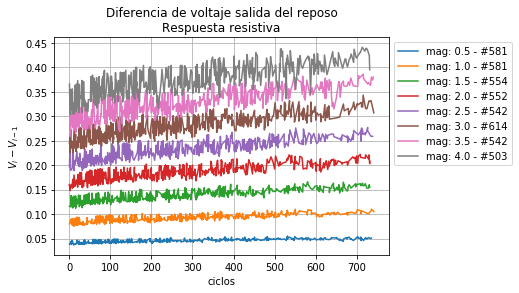

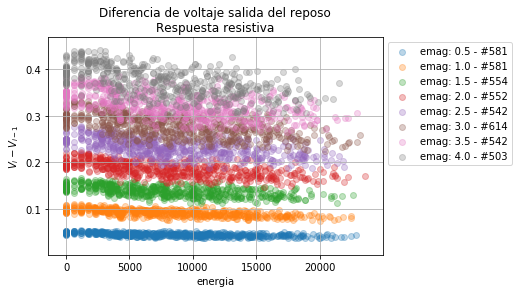

(<matplotlib.legend.Legend at 0x18ee4e8a7b8>, None, None)

In [16]:
WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 0.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 1.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 1.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 2.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 2.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 3.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 3.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 4.0 - #' + str(len(df_aux)))
plt.xlabel('ciclos')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 0.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 1.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 1.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 2.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 2.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 3.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 3.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 4.0 - #' + str(len(df_aux)), alpha=alpha)
plt.xlabel('energia')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()



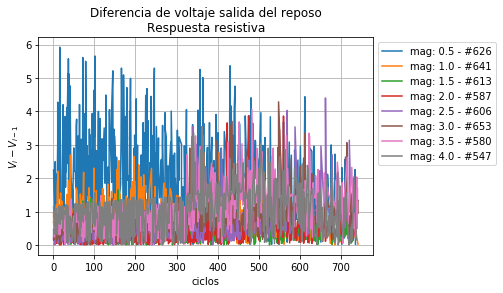

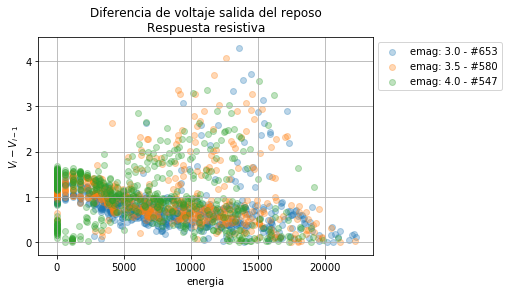

(<matplotlib.legend.Legend at 0x18ee41f5f98>, None, None)

In [17]:
#Graficos F2
WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 0.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 1.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 1.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 2.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 2.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 3.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 3.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F2'], label='mag: 4.0 - #' + str(len(df_aux)))
plt.xlabel('ciclos')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

WIN = 1
alpha = 0.3
# df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F1'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 0.5 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 1.0 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 1.5 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 2.0 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
# df_aux = df_aux[df_aux['F2'] > 0.01]
# df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 2.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 3.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F2'] = df_aux['F2'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 3.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[df_aux['F2'] > 0.01]
df_aux['F1'] = df_aux['F2'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F2'], label='emag: 4.0 - #' + str(len(df_aux)), alpha=alpha)
plt.xlabel('energia')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

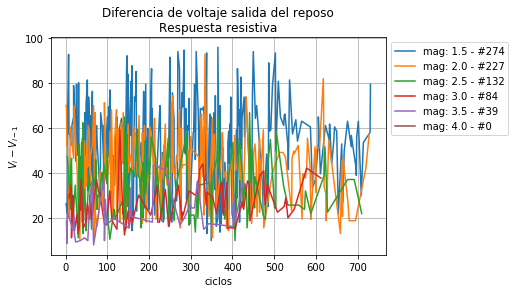

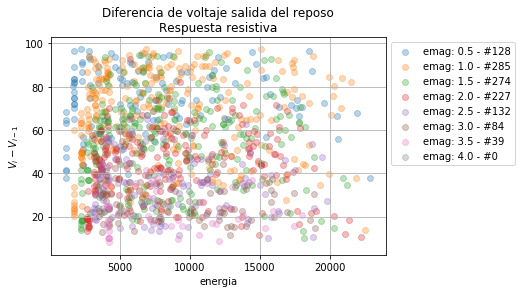

(<matplotlib.legend.Legend at 0x18ee41a6ef0>, None, None)

In [18]:
#Graficos F4
# WIN = 1
# alpha = 0.3
# df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
# df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01) ]
# df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
# plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 0.5 - #' + str(len(df_aux)))

# df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
# df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
# df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
# plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 1.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 1.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 2.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 2.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 3.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 3.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F4'], label='mag: 4.0 - #' + str(len(df_aux)))

plt.xlabel('ciclos')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F1'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 0.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 1.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 1.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 2.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F4'] > 0.01]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 2.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 3.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 3.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
df_aux = df_aux[(10000 > df_aux['F4']) & (df_aux['F4'] > 0.01)]
df_aux['F4'] = df_aux['F4'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F4'], label='emag: 4.0 - #' + str(len(df_aux)), alpha=alpha)
plt.xlabel('energia')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.title('Diferencia de voltaje salida del reposo\nRespuesta resistiva')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

In [19]:
def plot_energia_magnitud(df, m, ei, ef, WIN, alpha):
    df_aux = df[(df['magnitud'] >= m - 0.2) & (df['magnitud'] <= m + 0.2)]
    df_aux = df_aux[(df['energia'] >= ei) & (df['energia'] <= ef)]
    df_aux = df_aux[df_aux['F1'] > 0.01]
    df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean
    plt.plot(df_aux['ciclo'], df_aux['F1'],
             label='mag: ' + str(m) + ' - #' + str(len(df_aux)) + ' i: ' + str(ei) + '-' + str(ef))
    

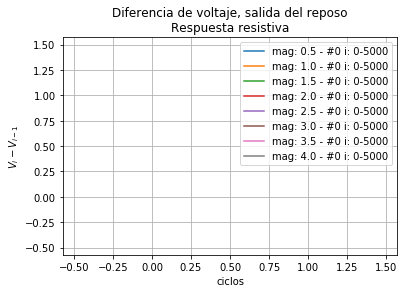

(<matplotlib.legend.Legend at 0x18ee4f520b8>, None, None)

In [20]:
WIN = 1
plot_energia_magnitud(df_aux, 0.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 1.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 1.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 2.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 2.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 3.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 3.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df_aux, 4.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 20000, 25000, WIN, alpha)
plt.title('Diferencia de voltaje, salida del reposo\nRespuesta resistiva')
plt.xlabel('ciclos')
plt.ylabel(r'$V_i - V_{i-1}$')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()


In [21]:
# comportamiento de potencia instantanea entregada
def potencia_instantanea_salto(arr_voltaje, arr_corriente, limite=10):
    aux = np.zeros(len(arr_voltaje))
    for i, serie in enumerate(arr_corriente):
        contador = 0
        for j, c in enumerate(serie):
            if c != 0 and aux[i] == 0:
                aux[i] = c * arr_voltaje[i][j]
                contador = 1
            elif contador < limite:
                aux[i] += c * arr_voltaje[i][j]
                contador += 1
            elif contador == limite: break
            
    return aux

In [22]:
df['F1'] = potencia_instantanea_salto(df['voltaje'], df['corriente'], limite=1)


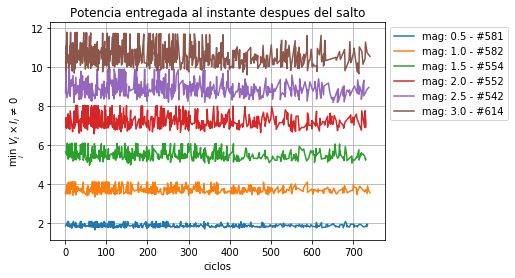

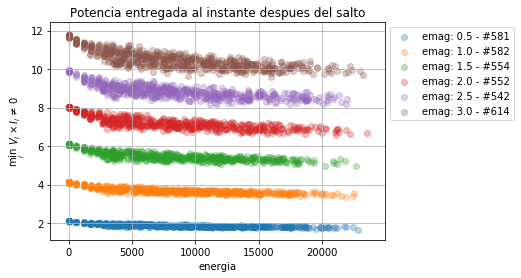

(<matplotlib.legend.Legend at 0x18ee4ddf7b8>, None, None)

In [23]:
WIN = 1
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 0.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 1.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 1.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 2.0 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 2.5 - #' + str(len(df_aux)))

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 3.0 - #' + str(len(df_aux)))

# df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
# df_aux = df_aux[df_aux['F1'] > 0.01]
# df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
# plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 3.5 - #' + str(len(df_aux)))

# df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
# df_aux = df_aux[df_aux['F1'] > 0.01]
# df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
# plt.plot(df_aux['ciclo'], df_aux['F1'], label='mag: 4.0 - #' + str(len(df_aux)))
plt.xlabel('ciclos')
plt.ylabel(r'$\min_i \ V_i \times I_i \ \ne \ 0$')
plt.title('Potencia entregada al instante despues del salto')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

WIN = 1
alpha = 0.3
df_aux = df[(df['magnitud'] >= 0.3) & (df['magnitud'] <= 0.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 0.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 0.8) & (df['magnitud'] <= 1.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 1.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.4) & (df['magnitud'] <= 1.6)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 1.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 1.8) & (df['magnitud'] <= 2.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 2.0 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.3) & (df['magnitud'] <= 2.7)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 2.5 - #' + str(len(df_aux)), alpha=alpha)

df_aux = df[(df['magnitud'] >= 2.8) & (df['magnitud'] <= 3.2)]
df_aux = df_aux[df_aux['F1'] > 0.01]
df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 3.0 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 3.3) & (df['magnitud'] <= 3.7)]
# df_aux = df_aux[df_aux['F1'] > 0.01]
# df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 3.5 - #' + str(len(df_aux)), alpha=alpha)

# df_aux = df[(df['magnitud'] >= 3.8) & (df['magnitud'] <= 4.2)]
# df_aux = df_aux[df_aux['F1'] > 0.01]
# df_aux['F1'] = df_aux['F1'].rolling(window=WIN).mean()
# plt.scatter(df_aux['energia'], df_aux['F1'], label='emag: 4.0 - #' + str(len(df_aux)), alpha=alpha)
plt.xlabel('energia')
plt.ylabel(r'$\min_i \ V_i \times I_i \ \ne \ 0$')
plt.title('Potencia entregada al instante despues del salto')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()



C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: float() argument must be a string or a number, not 'method'

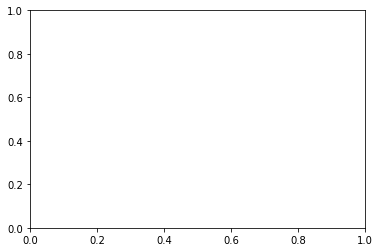

In [24]:
WIN = 5
plot_energia_magnitud(df, 0.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 0.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 1.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 1.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 1.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 1.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 2.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 2.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 2.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 2.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 3.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 3.0, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 3.5, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 3.5, 20000, 25000, WIN, alpha)
# plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()

plot_energia_magnitud(df, 4.0, 0, 5000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 10000, 15000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 15000, 20000, WIN, alpha)
# plot_energia_magnitud(df, 4.0, 20000, 25000, WIN, alpha)
plt.ylabel(r'$\min_i \ V_i \times I_i \ \ne \ 0$')
plt.title('Potencia entregada al instante despues del salto')
plt.xlabel('ciclos')
plt.legend(bbox_to_anchor=(1, 1)), plt.grid('on'), plt.show()


In [ ]:
def tiempo_a_inflexion(arr_voltaje):
    """
    funcion que entrega el tiempo necesario a la inflexion
    """
    
    
    
    return

Trabajo próximo:
- guardar curvas hasta el salto anterior (instante antes de 0)
- guardar voltaje anterior como etiqueta
- guardar temperatura inicial como etiqueta
- Para feature de degradación usar delta T del salto completo (inicio - fin)
- Ver fenomenolgía del circuito RC, ajustar función de transferencia de modelo RC
    - para encontrar la constante de proporcionalidad, tomar curvas de voltaje 'estables' donde $V_{i+1} - V_{i} < \epsilon$
    - Encontrar constante de tiempo entre esas curvas
    asdasd

# Grafico de curva de salud

In [25]:
lista = [str('reference charge')]
final = [str('rest post reference charge')]
t_carga, v_carga, c_carga, temp_carga, T_carga = carga_de_datos(documento, lista, final, nofinal=True)

lista = [str('reference discharge')]
final = [str('rest post reference discharge')]
t_descarga, v_descarga, c_descarga, temp_descarga, T_descarga = carga_de_datos(documento, lista, final, nofinal=True)
print(len(t_descarga))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
42


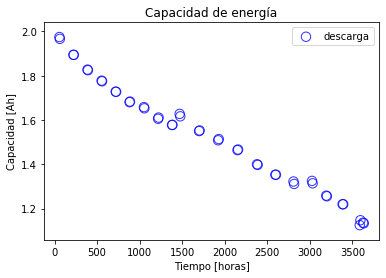

(Text(0.5, 1, 'Capacidad de energía'), None)

In [26]:
# integrar la descarga
energia_entregada = []
T = []
for k in t_descarga.keys():
    energia_entregada.append(sum(c_descarga[k]) / 360)
    T.append(np.min(t_descarga[k]) / 3600)
plt.scatter(T, energia_entregada, label='descarga', facecolor='none', s=88, edgecolors='b', alpha=0.8)
plt.ylabel('Capacidad [Ah]')
plt.xlabel('Tiempo [horas]')
plt.legend()
# plt.title('Capacidad de energía entregada por batería'), plt.show()

# integrar la carga
energia_entregada = []
T = []
for k in t_carga.keys():
    energia_entregada.append(sum(c_carga[k]) / 360)
    T.append(np.mean(t_carga[k]) / 3600)
# plt.scatter(T, np.abs(energia_entregada), label='carga', s=38, edgecolors='b', alpha=0.4)
plt.ylabel('Capacidad [Ah]')
plt.xlabel('Tiempo [horas]')
plt.legend()
plt.title('Capacidad de energía'), plt.show()

[ciclo, potencia, media y magnitud del salto] como identidad de un salto, a partir de ello obtener una respuesta dinamica con features